In [1]:
# Assignment

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [3]:
df_survey = pd.read_csv('https://cocl.us/datascience_survey_data')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [4]:
df_survey.shape

(6, 4)

In [5]:
df_survey.head(7)

Unnamed: 0  Very interested  Somewhat interested  \
0   Big Data (Spark / Hadoop)             1332                  729   
1  Data Analysis / Statistics             1688                  444   
2             Data Journalism              429                 1081   
3          Data Visualization             1340                  734   
4               Deep Learning             1263                  770   
5            Machine Learning             1629                  477   

   Not interested  
0             127  
1              60  
2             610  
3             102  
4             136  
5              74

In [6]:
df_survey.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

In [7]:
df_survey.head(7)

Unnamed: 0  Very interested  Somewhat interested  \
1  Data Analysis / Statistics             1688                  444   
5            Machine Learning             1629                  477   
3          Data Visualization             1340                  734   
0   Big Data (Spark / Hadoop)             1332                  729   
4               Deep Learning             1263                  770   
2             Data Journalism              429                 1081   

   Not interested  
1              60  
5              74  
3             102  
0             127  
4             136  
2             610

In [8]:
df_pct = pd.DataFrame(df_survey)

In [9]:
cols = ['Very interested', 'Somewhat interested', 'Not interested']
df_pct.loc[:, cols] = df_survey.loc[:, cols]/2233*100
df_pct.loc[:, cols].round(2)

Very interested  Somewhat interested  Not interested
1            75.59                19.88            2.69
5            72.95                21.36            3.31
3            60.01                32.87            4.57
0            59.65                32.65            5.69
4            56.56                34.48            6.09
2            19.21                48.41           27.32

In [10]:
df_survey.head(7)

Unnamed: 0  Very interested  Somewhat interested  \
1  Data Analysis / Statistics        75.593372            19.883565   
5            Machine Learning        72.951187            21.361397   
3          Data Visualization        60.008957            32.870578   
0   Big Data (Spark / Hadoop)        59.650694            32.646664   
4               Deep Learning        56.560681            34.482759   
2             Data Journalism        19.211823            48.410210   

   Not interested  
1        2.686968  
5        3.313927  
3        4.567846  
0        5.687416  
4        6.090461  
2       27.317510

In [11]:
df_pct.rename(columns={'Unnamed: 0':'topics'}, inplace=True)

In [12]:
df_pct.set_index('topics', inplace=True)

In [13]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [14]:
for i in range(15):
    label = '{}%'.format(int(df_top15[i]),',')
    plt.annotate(label,
                 xy=(df_top15[i], i-.25),
                 va='bottom',
                 ha='right',
                 color='white'
                )

NameError: name 'df_top15' is not defined

In [15]:
for i in range(6):
    label = '{}%'.format(round(df_pct['Very interested'][i], 2))
    print(label)
    ax.annotate(label,
                xy=(i, round(df_pct['Very interested'][i])),
                va='bottom',
                ha='center',
                color='black'
                )


75.59%


NameError: name 'ax' is not defined

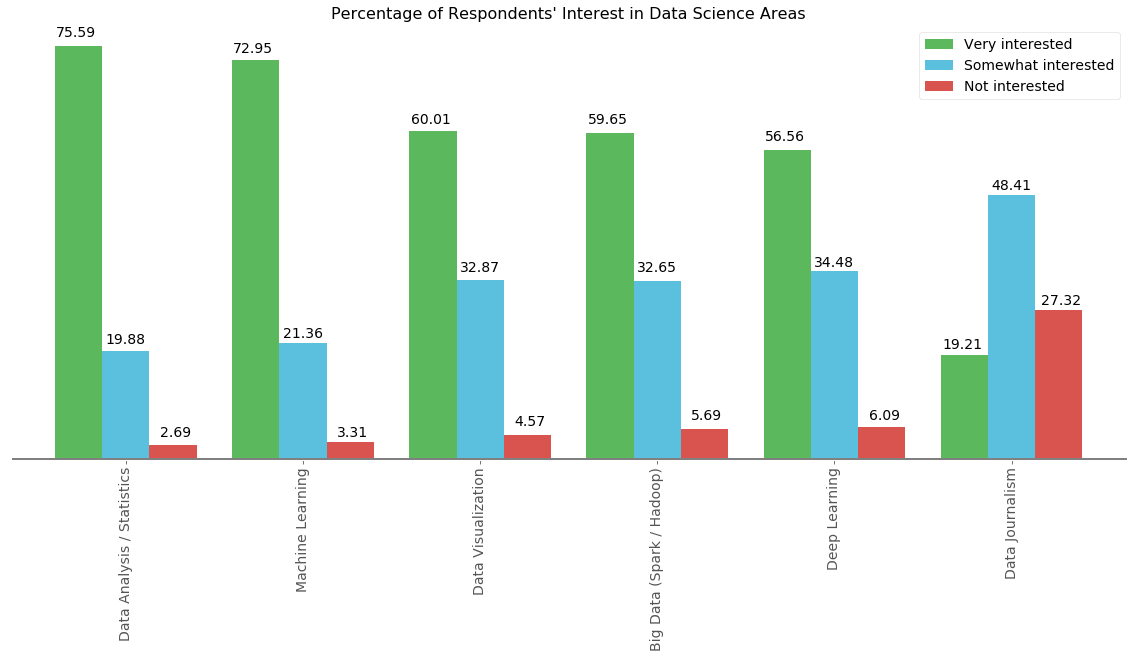

In [16]:
ax = df_pct.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)

ax.set_xlabel('', fontsize=20) # add to x-label to the plot
#ax.set_ylabel('Number of immigrants') # add y-label to the plot
ax.set_title('Percentage of Respondents\' Interest in Data Science Areas', fontsize=16) # add title to the plot
#ax.set_frame_on(False)
#ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
#ax.spines['left'].set_smart_bounds(False)
#ax.tick_params(top=False)
#ax.tick_params(left=False)
ax.set_yticks([]) 

#ax.legend(frameon=False, fontsize=14)
ax.legend(fontsize=14).get_frame().set_facecolor('w')
#ax.legend(fontsize=14, framealpha=1.0)
ax.axhline(linewidth=4, color="#808080")
ax.set_facecolor('w')


for i in range(6):
    label = '{}'.format(round(df_pct['Very interested'][i], 2))
    #print(label)
    ax.annotate(label,
                xy=(i-0.28, round(df_pct['Very interested'][i])+2),
                va='center',
                ha='center',
                color='black',
                size=14
                )
    
for i in range(6):
    label = '{}'.format(round(df_pct['Somewhat interested'][i], 2))
    #print(label)
    ax.annotate(label,
                xy=(i, round(df_pct['Somewhat interested'][i])+2),
                va='center',
                ha='center',
                color='black',
                size=14
                )
    
for i in range(6):
    label = '{}'.format(round(df_pct['Not interested'][i], 2))
    #print(label)
    ax.annotate(label,
                xy=(i+0.28, round(df_pct['Not interested'][i])+2),
                va='center',
                ha='center',
                color='black',
                size=14
                )

plt.show()

In [17]:
# Map

In [18]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [19]:
df_crime = pd.read_csv('https://cocl.us/sanfran_crime_dataset')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [20]:
df_crime.shape

(150500, 13)

In [21]:
df_crime.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [22]:
df_crime.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [23]:
df_crime.drop(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'], axis=1, inplace=True)

In [24]:
df_crime.rename(columns={'PdDistrict':'Neighborhood'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_crime.head()

Neighborhood
0     SOUTHERN
1     SOUTHERN
2      BAYVIEW
3   TENDERLOIN
4      MISSION

In [25]:
df_neighbors=df_crime.groupby('Neighborhood', axis=0).size().reset_index(name='Count')

In [26]:
df_neighbors.shape

(10, 2)

In [27]:
df_neighbors.head(12)

Neighborhood  Count
0      BAYVIEW  14303
1      CENTRAL  17666
2    INGLESIDE  11594
3      MISSION  19503
4     NORTHERN  20100
5         PARK   8699
6     RICHMOND   8922
7     SOUTHERN  28445
8      TARAVAL  11325
9   TENDERLOIN   9942

In [28]:
for i in range(10):
    df_neighbors['Count'][i]=i*100+100
    
print(type(df_neighbors['Count'][1]))

C:\WPy-3662\python-3.6.6.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'numpy.int64'>


In [29]:

import folium

print('Folium installed and imported!')

Folium installed and imported!


!conda install -c conda-forge folium=0.5.0 --yes

In [30]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [31]:
# download countries geojson file
!wget --quiet https://cocl.us/sanfran_geojson -O san_francisco.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [34]:
sf_geo = r'san_francisco.geojson' # geojson file
sf_geo = r'https://cocl.us/sanfran_geojson/san-francisco.geo.json'
# create a plain world map
sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [38]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
sf_map.choropleth(
    geo_data=sf_geo,
    data=df_neighbors,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Number'
)

# display map
sf_map

C:\WPy-3662\python-3.6.6.amd64\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [78]:
# Import libraries
import pandas as pd
import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('/Users/y.holtz/Desktop/', 'us-states.json')
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_unemployment = os.path.join('/Users/y.holtz/Desktop/', 'US_Unemployment_Oct2012.csv')
state_data = pd.read_csv(state_unemployment)
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Unemployment'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#292_folium_chloropleth_USA1.html')


FileNotFoundError: [Errno 2] File b'/Users/y.holtz/Desktop/US_Unemployment_Oct2012.csv' does not exist: b'/Users/y.holtz/Desktop/US_Unemployment_Oct2012.csv'